Model Resuspension Check

In [2]:
%matplotlib inline
import sys
import random
import xarray as xr
import numpy as np
import os
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import glob
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from cartopy import crs, feature



import cmocean
cmap = cmocean.cm.deep

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = 1 - mesh.tmask[0]
#
path_months = '/results2/SalishSea/month-avg.202111/'
path_days_h = '/results2/SalishSea/nowcast-green.202111/'

In [4]:
def monthly_prefix(date, path, area='biol_T_'):
    #
    prefix = os.path.join(path, f'SalishSeaCast_1m_{area}{date.strftime("%Y%m%d").lower()}*')
    file_name = glob.glob(prefix) 
    #
    return file_name

In [5]:
def hourly_prefix(date, path, area='biol_T_'):
    #
    prefix = os.path.join(path, f'SalishSeaCast_1m_{area}{date.strftime("%Y%m%d").lower()}*')
    file_name = glob.glob(prefix) 
    #
    return file_name

Getting the data files for August 06, 2015 - March 10, 2016

In [6]:
def date_files(date, path, prefix_type= 'grid_T.nc'):
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path, folder + f'/SalishSea_1h_{date.strftime("%Y%m%d").lower()}_{date.strftime("%Y%m%d").lower()}_{prefix_type}*')
    file_name = glob.glob(prefix) 
    return file_name

In [7]:
path = '/ocean/sallen/timbucktwo/exchange/'

In [8]:
#
def get_timestamps(start,length):
    timestamps=[]
    duration = timedelta(days=length)
    for day in range(duration.days):
        timestamps.append([start + timedelta(days=day)])
    return timestamps

#get_timestamps(datetime(2015,8,6), )

In [9]:
begin = datetime(2015,8,6)
end = datetime(2015,9,6)
#end = datetime(2016,3,10)
t_len = (end - begin).days
#
dates = get_timestamps(begin,t_len)

In [10]:
files = []
for i in range(t_len):
    files.append(date_files(dates[i][0],path))

Lets see how the bottom stress data looks like

In [11]:
path_bat = '/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc'
bathymetry = xr.open_dataset(path_bat).Bathymetry
cmap_bs = 'jet'
#cmap_bs.set_bad('grey')
#cmap.set_bad('grey')
#
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mask = mesh.tmask[0]

In [12]:
model = xr.open_dataset(files[0][0])

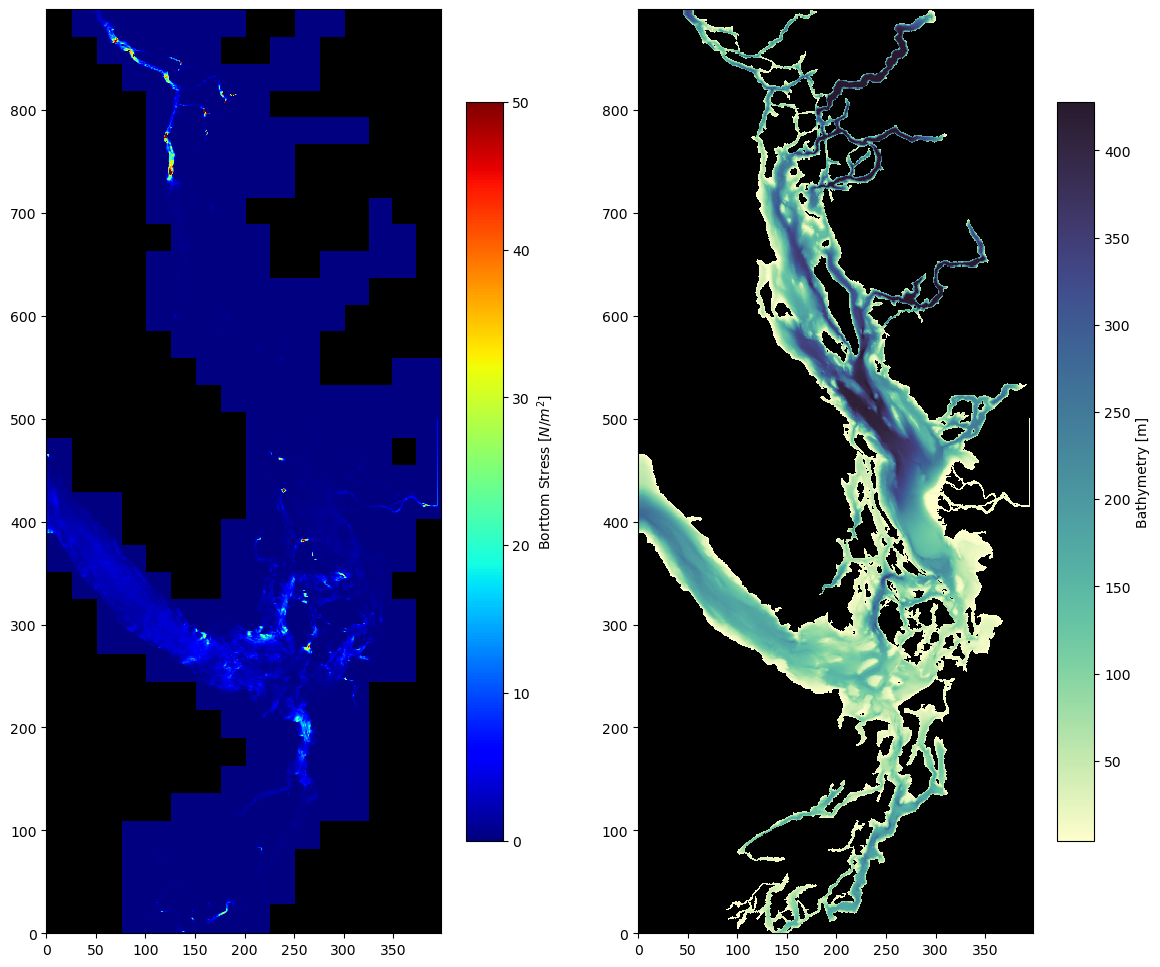

In [13]:
fig, ax = plt.subplots(1,2,figsize = (14,12))
ax[0].pcolormesh(mask[0,:,:], cmap = 'gray')
bs = ax[0].pcolormesh(model['taubot'][0,:,:], cmap=cmap_bs, vmin = 0, vmax = 50)
ax[1].pcolormesh(mask[0,:,:], cmap = 'gray')
bat = ax[1].pcolormesh(bathymetry, cmap=cmap)
cbar = fig.colorbar(bs, ax=ax[0], location='right', shrink=0.8)
cbar.set_label('Borttom Stress $[N/m^{2}]$')
#
cbar1 = fig.colorbar(bat, ax=ax[1], location='right', shrink=0.8)
cbar1.set_label('Bathymetry [m]')

Lets see if we can get all the data contained in a single variable:

In [14]:
data_list = []
for i in range(len(files)):
    data = xr.open_dataset(files[i][0])['taubot']
    data_list.append(data)

In [15]:
combined = xr.concat(data_list, dim = 'time_counter')

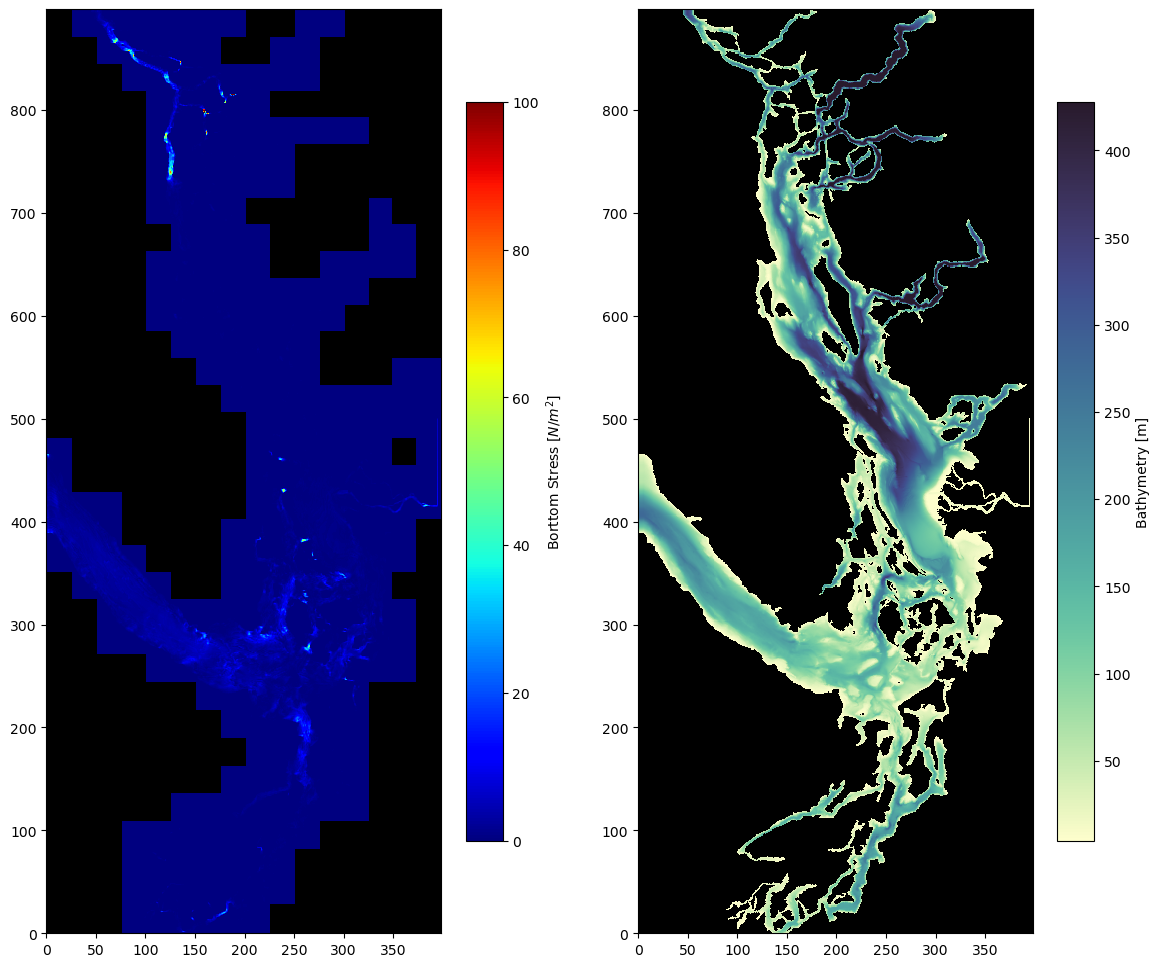

In [16]:
fig, ax = plt.subplots(1,2,figsize = (14,12))
ax[0].pcolormesh(mask[0,:,:], cmap = 'gray')
bs = ax[0].pcolormesh(combined[0,:,:], cmap=cmap_bs, vmin = 0, vmax = 100)
ax[1].pcolormesh(mask[0,:,:], cmap = 'gray')
bat = ax[1].pcolormesh(bathymetry, cmap=cmap)
cbar = fig.colorbar(bs, ax=ax[0], location='right', shrink=0.8)
cbar.set_label('Borttom Stress $[N/m^{2}]$')
#
cbar1 = fig.colorbar(bat, ax=ax[1], location='right', shrink=0.8)
cbar1.set_label('Bathymetry [m]')

In [17]:
path_animation = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/PBDE_runs/animations'

In [18]:
#fig, ax = plt.subplots(1,2,figsize = (14,12))
#ax[0].pcolormesh(mask[0,:,:], cmap = 'gray')
#ax[1].pcolormesh(mask[0,:,:], cmap = 'gray')
#bat = ax[1].pcolormesh(bathymetry, cmap=cmap)
##cbar = fig.colorbar(bs, ax=ax[0], location='right', shrink=0.8)
##cbar.set_label('Bottom Stress $[N/m^{2}]$')
##
#cbar1 = fig.colorbar(bat, ax=ax[1], location='right', shrink=0.8)
#cbar1.set_label('Bathymetry [m]')
##ax[0].set_aspect(5/4.4)
#ax[0].set_xlabel('Grid X')
#ax[0].set_ylabel('Grid Y')
#nmin, nmax = 0, -1
##
##
#FFMpegWriter = animation.writers['ffmpeg']  
#metadata = dict(title='Bottom_Stress_animation', artist='Vicente',
#                comment='Bottom_Stress')
#writer = FFMpegWriter(fps=12, metadata=metadata)
#
#with writer.saving(fig, path_animation+"/Bottom_Stress.mp4", 100):
#    for tm in range(len(combined['time_counter'])):
#        bs = ax[0].pcolormesh(combined[tm,:,:], cmap=cmap_bs, vmin = 0, vmax = 100)
#        if tm == 0:  # Adding colorbar only once
#            bs.set_clim(0, 100)
#            cb1 = fig.colorbar(bs, ax=ax[0], location='right', shrink=0.8)
#            cb1.set_label('Bottom Stress $[N/m^{2}]$')
#        ax[0].set_title(f' t = ' + str(combined['time_counter'][tm].values))
#        writer.grab_frame()

Lets see what we can get from the bottom velocities from the U component in the model.


- Problem to solve:


$$u = \frac{u^{*}}{k} \cdot log(\frac{z}{z_{*}})$$

We need to get the estimate of the bottom stress ($u^{*}$):

$$u^{*} = \frac{u \cdot k}{log(\frac{z}{z_{*}})}$$

Where $k = 0.42$, $z_{*} = 0.07 m$ and $z = e3t$ 

In [19]:
path_days_h = '/results2/SalishSea/nowcast-green.202111/'

In [20]:
files_U = []
for i in range(t_len):
    files_U.append(date_files(dates[i][0],path_days_h, prefix_type = 'grid_U.nc'))

In [21]:
data_list_U = []
for i in range(len(files_U)):
    data = xr.open_dataset(files_U[i][0])['vozocrtx'][:,-1,:,:]
    data_list_U.append(data)

In [22]:
combined_U = xr.concat(data_list_U, dim = 'time_counter')

In [23]:
files_e3t = []
for i in range(t_len):
    files_e3t.append(date_files(dates[i][0],path_days_h, prefix_type = 'grid_T.nc'))

In [24]:
data_list_e3t = []
for i in range(len(files_e3t)):
    data = xr.open_dataset(files_e3t[i][0])['e3t'][:,-1,:,:]
    data_list_e3t.append(data)

In [25]:
combined_e3t = xr.concat(data_list_e3t, dim = 'time_counter')

In [29]:
k = 0.42
U_k = np.multiply(combined_U, k)
log = np.log10(np.divide(combined_e3t, 0.07))

In [30]:
u_stress = np.divide(U_k, log)

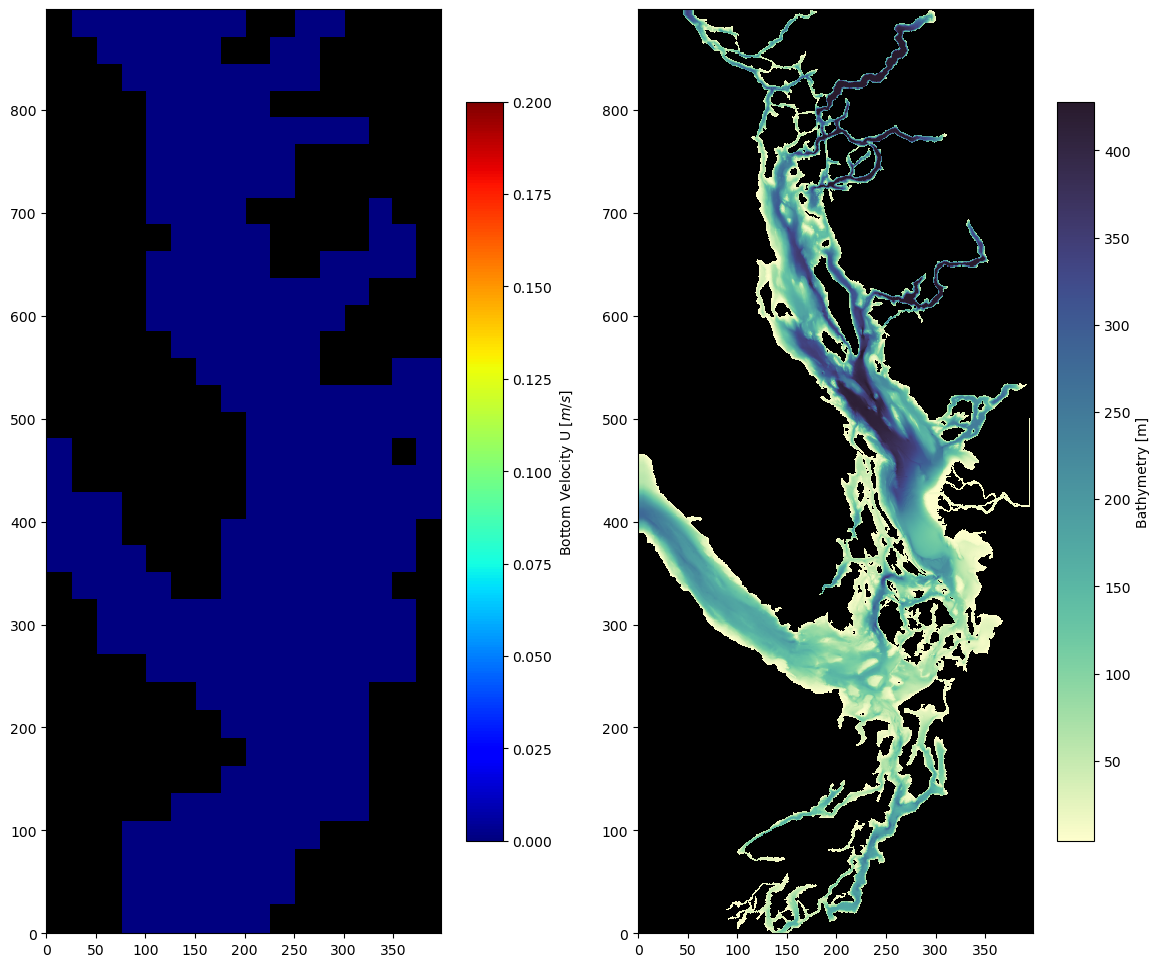

In [33]:
fig, ax = plt.subplots(1,2,figsize = (14,12))
ax[0].pcolormesh(mask[0,:,:], cmap = 'gray')
bv = ax[0].pcolormesh(u_stress[0,:,:], cmap=cmap_bs, vmin = 0, vmax = 0.2)
ax[1].pcolormesh(mask[0,:,:], cmap = 'gray')
bathy = ax[1].pcolormesh(bathymetry, cmap=cmap)
cbar = fig.colorbar(bv, ax=ax[0], location='right', shrink=0.8)
cbar.set_label('Bottom Velocity U $[m/s]$')
#
cbar1 = fig.colorbar(bathy, ax=ax[1], location='right', shrink=0.8)
cbar1.set_label('Bathymetry [m]')

In [34]:
fig, ax = plt.subplots(1,2,figsize = (14,12))
ax[0].pcolormesh(mask[0,:,:], cmap = 'gray')
ax[1].pcolormesh(mask[0,:,:], cmap = 'gray')
bat = ax[1].pcolormesh(bathymetry, cmap=cmap)
#cbar = fig.colorbar(bs, ax=ax[0], location='right', shrink=0.8)
#cbar.set_label('Bottom Stress $[N/m^{2}]$')
#
cbar1 = fig.colorbar(bat, ax=ax[1], location='right', shrink=0.8)
cbar1.set_label('Bathymetry [m]')
#ax[0].set_aspect(5/4.4)
ax[0].set_xlabel('Grid X')
ax[0].set_ylabel('Grid Y')
nmin, nmax = 0, -1
#
#
FFMpegWriter = animation.writers['ffmpeg']  
metadata = dict(title='U_Stress_animation', artist='Vicente',
                comment='U_Stress')
writer = FFMpegWriter(fps=12, metadata=metadata)

with writer.saving(fig, path_animation+"/Bottom_U_Stress.mp4", 100):
    for tm in range(len(combined_U['time_counter'])):
        bs = ax[0].pcolormesh(u_stress[tm,:,:], cmap=cmap_bs, vmin = 0, vmax = 0.1)
        if tm == 0:  # Adding colorbar only once
            bs.set_clim(0, 0.1)
            cb1 = fig.colorbar(bs, ax=ax[0], location='right', shrink=0.8)
            cb1.set_label('Bottom Stress (u*) $[m / s]$')
        ax[0].set_title(f' t = ' + str(combined_U['time_counter'][tm].values))
        writer.grab_frame()

KeyboardInterrupt: 

Nice try!, but is not that easy heheh

Open new script...called bottom_problem.ipynb